In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

In [10]:
transform =transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

train_dataset=torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transform)
test_dataset=torchvision.datasets.CIFAR10(root='./data',train=False,download=True,transform=transform)

In [11]:
len(train_dataset),len(test_dataset)

(50000, 10000)

In [12]:
train_loader=DataLoader(train_dataset,batch_size=100,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=100,shuffle=True)

In [13]:
for i,(images,labels) in enumerate(train_loader):
    print(images.shape)
    print(labels.shape)
    break

torch.Size([100, 3, 32, 32])
torch.Size([100])


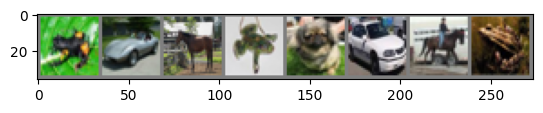

In [14]:
def imshow(img):
    img=img/2+0.5
    npimg=img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()

imshow(torchvision.utils.make_grid(images[:8]))

In [15]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [16]:
[classes[i] for i in labels[:8]]

['frog', 'car', 'horse', 'frog', 'dog', 'car', 'horse', 'frog']

In [22]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.network=nn.Sequential(
            nn.Conv2d(3,32,kernel_size=(3,3),padding='same'),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2),stride=(2,2)),
            nn.Conv2d(32,64,kernel_size=(3,3)),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2),stride=(2,2))
        )
        self.fc_layer=nn.Sequential(
            nn.Flatten(),
            nn.Linear(64*7*7,600),
            nn.ReLU(),
            nn.Linear(600,120),
            nn.ReLU(),
            nn.Linear(120,10)
        )
    def forward(self,x):
        y=self.network(x)
        return self.fc_layer(y)

In [23]:
num_epochs=10
learning_rate=0.001

model=CNN()
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=learning_rate)

In [24]:
for epoch in range(num_epochs):
    running_loss=0.0
    for images, labels in train_loader:
        outputs=model(images)
        loss=criterion(outputs,labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
    print(f"Epoch:{epoch}\trunning_loss:{running_loss:.4f}")

model.eval()
with torch.no_grad():
    correct=0
    total=0
    for images , labels in test_loader:
        outputs=model(images)
        loss=criterion(outputs,labels)
        _,predicted=torch.max(outputs.data,1)
        total+=len(labels)
        correct+=(predicted==labels).sum().item()
    print(f"Accuracy:{100*correct/total:.4f}%")

Epochs:10	running_loss:697.2022
Epochs:10	running_loss:491.7170
Epochs:10	running_loss:396.1125
Epochs:10	running_loss:316.1613
Epochs:10	running_loss:241.2494
Epochs:10	running_loss:170.9597
Epochs:10	running_loss:112.4059
Epochs:10	running_loss:69.9286
Epochs:10	running_loss:48.7729
Epochs:10	running_loss:45.5402
Accuracy:71.7200%
